In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Como vemos en la figura el componente en H va de 0 a179, 
y en este pasan colores de rojo, naranja, amarillo, verde, azul, 
violeta y nuevamente rojo, entonces vamos a determinar 
2 rangos para el color rojo que está presente al principio y al final,
el primer rango lo determinaremos de 0 a 8, y el segundo de 175 a 179 
en H, mientras que para los componente S de 100 a 255, y V de 20 a 255, 
para ambos rangos.

In [2]:
#color Rojo
rojoBajo1 = np.array([0,140,90],np.uint8)
rojoAlto1 = np.array([8,255,255],np.uint8)
rojoBajo2 = np.array([160,140,90],np.uint8)
rojoAlto2 = np.array([180,255,255],np.uint8)

In [3]:
#color Amarillo
amarilloBajo1 = np.array([16,100,50],np.uint8)
amarilloAlto1 = np.array([33,255,255],np.uint8)
amarilloBajo2 = np.array([20,100,50],np.uint8)
amarilloAlto2 = np.array([34,255,255],np.uint8)

# Cargamos la imagen de la fresa

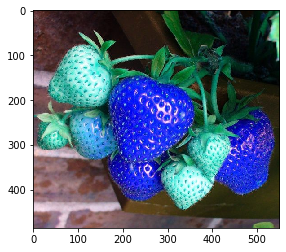

In [4]:
imagen = cv2.imread("fresas2.png")
imagen_2=cv2.imread("platanos.png")
plt.imshow(imagen)

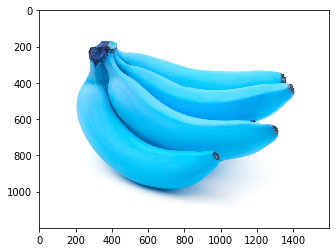

In [5]:
plt.imshow(imagen_2)

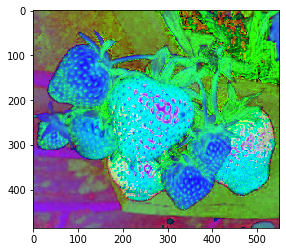

In [6]:
imagen_hsv=cv2.cvtColor(imagen,cv2.COLOR_BGR2HSV)
imagen_hsv_2=cv2.cvtColor(imagen_2,cv2.COLOR_BGR2HSV)
plt.imshow(imagen_hsv)

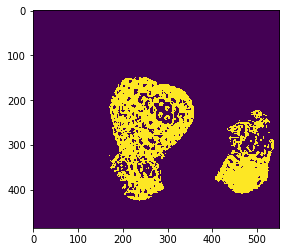

In [7]:
mascara_1=cv2.inRange(imagen_hsv,rojoBajo1,rojoAlto1)
mascara_2=cv2.inRange(imagen_hsv,rojoBajo2,rojoAlto2)
mascara=cv2.add(mascara_1,mascara_2)
mascara=cv2.medianBlur(mascara,7)
plt.imshow(mascara_1)

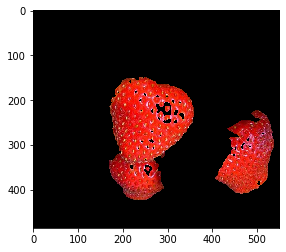

In [8]:
mascara=cv2.bitwise_and(imagen,imagen,mask=mascara)
mascara_plt=cv2.cvtColor(mascara,cv2.COLOR_BGR2RGB)
plt.imshow(mascara_plt)

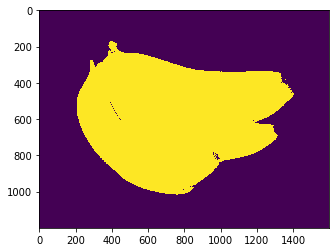

In [9]:
mascara_1=cv2.inRange(imagen_hsv_2,amarilloBajo1,amarilloAlto1)
mascara_2=cv2.inRange(imagen_hsv_2,amarilloBajo2,amarilloAlto2)
mascara=cv2.add(mascara_1,mascara_2)
mascara=cv2.medianBlur(mascara,7)
plt.imshow(mascara_1)

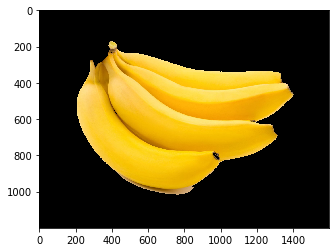

In [10]:
mascara=cv2.bitwise_and(imagen_2,imagen_2,mask=mascara)
mascara_plt=cv2.cvtColor(mascara,cv2.COLOR_BGR2RGB)
plt.imshow(mascara_plt)

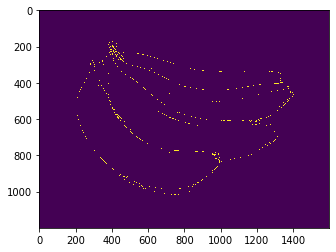

In [11]:
contorno= cv2.Canny(image=mascara,threshold1=100,threshold2=100)  
plt.imshow(contorno) 


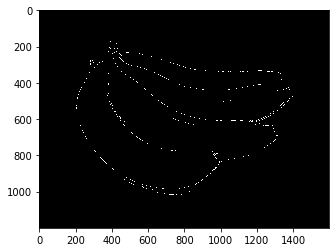

In [12]:
mascara=cv2.blur(mascara,ksize=(5,5))
contorno= cv2.Canny(image=mascara,threshold1=100,threshold2=100)
contorno_plt=cv2.cvtColor(contorno,cv2.COLOR_BGR2RGB)
plt.imshow(contorno_plt)

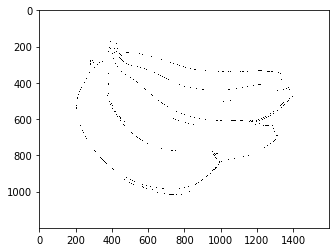

In [13]:
contorno=cv2.bitwise_not(contorno)
contorno_plt=cv2.cvtColor(contorno,cv2.COLOR_BGR2RGB)
plt.imshow(contorno_plt)


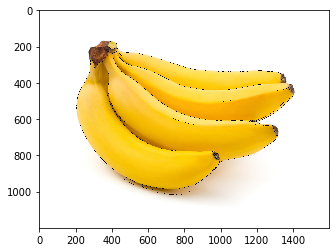

In [14]:
suma=cv2.bitwise_and(imagen_2,imagen_2,mask=contorno)
contorno_plt=cv2.cvtColor(suma,cv2.COLOR_BGR2RGB)
plt.imshow(contorno_plt)

In [15]:
ty,tx,td=suma.shape
suma.shape

(1200, 1600, 3)

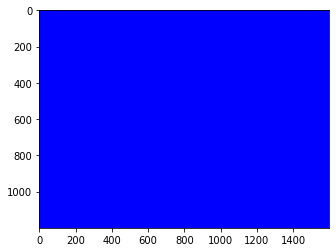

In [16]:
fondo_verde=cv2.imread("fondo_azul.png")
fondo_verde=cv2.resize(fondo_verde,(tx,ty))
fondo_verde_plt=cv2.cvtColor(fondo_verde,cv2.COLOR_BGR2RGB)
plt.imshow(fondo_verde_plt)


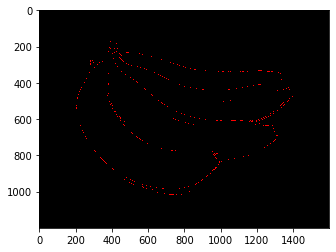

In [17]:
contorno=cv2.bitwise_not(contorno)
nuevo_fondo=cv2.bitwise_and(fondo_verde,fondo_verde,mask=contorno)
plt.imshow(nuevo_fondo)

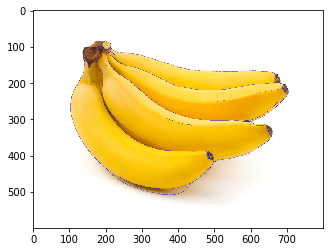

In [18]:
suma_total=cv2.add(suma,nuevo_fondo)
suma_total=cv2.resize(suma_total,(ty//2,tx//2))
suma_total_plt=cv2.cvtColor(suma_total,cv2.COLOR_BGR2RGB)
plt.imshow(suma_total_plt)

In [19]:
imagen_guardada=cv2.imwrite("imagen_final.png",suma_total)